# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from numpy import percentile

# Read data

In [ ]:
df_train = pd.read_csv("./train.csv")

In [ ]:
df_train.head()

,id,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Price
0,26813,964,Hooghly Chinsurah,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,7500000
1,10365,1075,Virar West,2,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,6200000
2,17863,2092,Manikonda,3,0,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,10400000
3,24337,1174,Devanahalli,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,18600000
4,12590,1380,Kharghar,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9500000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26370 entries, 0 to 26369
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   26370 non-null  int64 
 1   Area                 26370 non-null  int64 
 2   Location             26370 non-null  object
 3   No. of Bedrooms      26370 non-null  int64 
 4   Resale               26370 non-null  int64 
 5   MaintenanceStaff     26370 non-null  int64 
 6   Gymnasium            26370 non-null  int64 
 7   SwimmingPool         26370 non-null  int64 
 8   LandscapedGardens    26370 non-null  int64 
 9   JoggingTrack         26370 non-null  int64 
 10  RainWaterHarvesting  26370 non-null  int64 
 11  IndoorGames          26370 non-null  int64 
 12  ShoppingMall         26370 non-null  int64 
 13  Intercom             26370 non-null  int64 
 14  SportsFacility       26370 non-null  int64 
 15  ATM                  26370 non-null  int64 
 16  Club

In [ ]:
df_train.nunique()

,0
id,26370
Area,2326
Location,1640
No. of Bedrooms,9
Resale,2
MaintenanceStaff,3
Gymnasium,3
SwimmingPool,3
LandscapedGardens,3
JoggingTrack,3


In [ ]:
df_train.select_dtypes(exclude=['number']).columns

Index(['Location'], dtype='object')

# Drop: id, Location in train set

In [ ]:
# @title Drop: id, Location in train set
df_train = df_train.drop(['Location', 'id'], axis=1)

In [ ]:
df_train.head()

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Price
0,964,3,0,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,7500000
1,1075,2,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,6200000
2,2092,3,0,1,1,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,10400000
3,1174,2,1,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,18600000
4,1380,2,1,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9500000


In [ ]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Price
Area,1.000000,0.708142,-0.062190,-0.051036,-0.040355,-0.039327,-0.042760,-0.042145,-0.043976,-0.043023,-0.049810,-0.042259,-0.042350,-0.049370,-0.039805,-0.050405,-0.044134,-0.042048,-0.045723,-0.047706,-0.047389,-0.044209,-0.050497,-0.048933,-0.046503,-0.048174,-0.050694,-0.039031,-0.046400,-0.049918,-0.045762,-0.048795,-0.050149,-0.049290,-0.049120,-0.049091,-0.050423,-0.049064,0.278338
No. of Bedrooms,0.708142,1.000000,-0.082655,-0.044476,-0.036898,-0.035368,-0.037744,-0.037487,-0.039616,-0.037024,-0.041891,-0.034629,-0.036197,-0.042017,-0.035752,-0.042306,-0.041269,-0.039308,-0.041316,-0.040781,-0.040230,-0.038336,-0.042379,-0.040632,-0.038129,-0.040284,-0.042257,-0.034970,-0.038487,-0.042202,-0.039351,-0.040555,-0.041874,-0.040891,-0.040813,-0.040915,-0.041985,-0.040800,0.157496
Resale,-0.062190,-0.082655,1.000000,0.063478,0.050160,0.047785,0.051229,0.050161,0.055672,0.048931,0.056324,0.053151,0.055692,0.055560,0.051702,0.057476,0.057316,0.054251,0.059154,0.057816,0.053788,0.050423,0.056893,0.056355,0.062966,0.058030,0.057292,0.050277,0.056691,0.060175,0.056472,0.056177,0.055902,0.056756,0.056281,0.056768,0.058214,0.056307,0.055789
MaintenanceStaff,-0.051036,-0.044476,0.063478,1.000000,0.996693,0.996580,0.997166,0.997128,0.997578,0.997126,0.998537,0.996680,0.997035,0.998310,0.996852,0.998392,0.997879,0.997188,0.997779,0.998234,0.998203,0.997314,0.998542,0.998329,0.997376,0.998250,0.998652,0.996335,0.996994,0.998402,0.997420,0.998265,0.998649,0.998271,0.998226,0.998252,0.998626,0.998240,0.043594
Gymnasium,-0.040355,-0.036898,0.050160,0.996693,1.000000,0.998812,0.998036,0.998277,0.997520,0.998089,0.997434,0.997475,0.997766,0.997436,0.998610,0.997373,0.997666,0.997810,0.996938,0.997496,0.997604,0.997886,0.997372,0.997406,0.996469,0.997183,0.997421,0.998630,0.997090,0.997098,0.997139,0.997299,0.997503,0.997183,0.997311,0.997357,0.997284,0.997282,0.045341
SwimmingPool,-0.039327,-0.035368,0.047785,0.996580,0.998812,1.000000,0.998323,0.998595,0.997787,0.998417,0.997642,0.997468,0.997752,0.997683,0.998739,0.997523,0.997644,0.997589,0.997055,0.997788,0.997765,0.998254,0.997510,0.997578,0.996348,0.997327,0.997529,0.998386,0.996926,0.996910,0.997464,0.997482,0.997654,0.997336,0.997487,0.997504,0.997428,0.997461,0.045557
LandscapedGardens,-0.042760,-0.037744,0.051229,0.997166,0.998036,0.998323,1.000000,0.998611,0.998144,0.998561,0.997803,0.997231,0.997260,0.997817,0.997898,0.997742,0.998107,0.997424,0.997620,0.997853,0.997843,0.998280,0.997694,0.997620,0.996577,0.997388,0.997794,0.997908,0.996880,0.997110,0.997665,0.997532,0.997858,0.997416,0.997541,0.997581,0.997666,0.997533,0.044716
JoggingTrack,-0.042145,-0.037487,0.050161,0.997128,0.998277,0.998595,0.998611,1.000000,0.998293,0.998516,0.998008,0.997308,0.997353,0.997990,0.998203,0.997965,0.998397,0.997415,0.997612,0.998360,0.998027,0.998604,0.997937,0.997664,0.996518,0.997415,0.997825,0.998040,0.996792,0.997043,0.998088,0.997581,0.997923,0.997462,0.997549,0.997567,0.997652,0.997559,0.044299
RainWaterHarvesting,-0.043976,-0.039616,0.055672,0.997578,0.997520,0.997787,0.998144,0.998293,1.000000,0.998190,0.997766,0.996961,0.997062,0.997794,0.997665,0.997768,0.998413,0.997594,0.997873,0.998153,0.997510,0.998112,0.997719,0.997501,0.996468,0.997360,0.997731,0.997402,0.996889,0.996975,0.998099,0.997402,0.997758,0.997391,0.997389,0.997418,0.997650,0.997402,0.044946
IndoorGames,-0.043023,-0.037024,0.048931,0.997126,0.998089,0.998417,0.998561,0.998516,0.998190,1.000000,0.998064,0.997209,0.997456,0.998208,0.998111,0.997995,0.997905,0.997250,0.997404,0.998042,0.998112

# Train, Val, Test split

In [ ]:
X = df_train.drop('Price', axis=1)
y = df_train['Price']

Data Distribution

<Axes: xlabel='Price', ylabel='Count'>

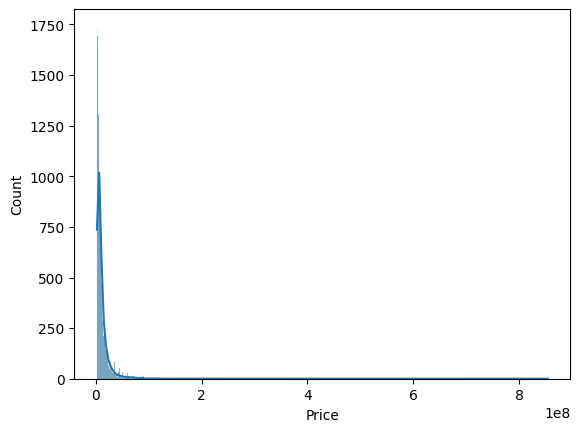

In [ ]:
sns.histplot(y, kde = True)

Nhận xét: Phân bố giá không đều, chủ yếu tập trung ở khoảng (0,1)

In [ ]:
# calculate interquartile range
q25, q75 = percentile(y, 25), percentile(y, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

cond = (y >= lower) & (y <= upper)

X = X[cond]
y = y[cond]
X = X.reset_index(drop=True)  # Reset index starting from 0
y = y.reset_index(drop=True)  # Reset index starting from 0

# Random Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

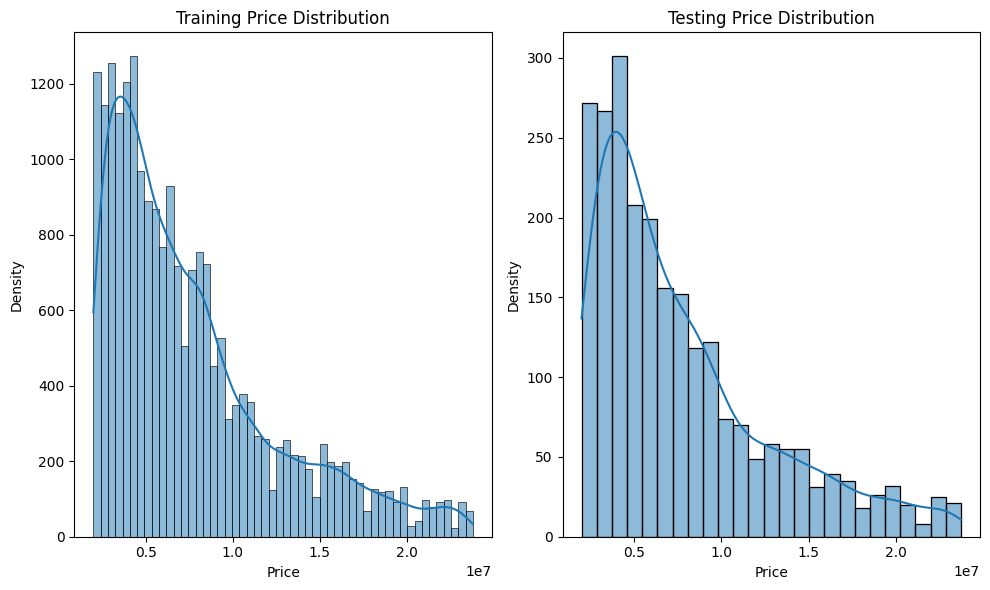

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))  # Create 2-row subplot for efficient layout

# Plot training data histogram with KDE (horizontal)
sns.histplot(y_train, kde=True, ax=axes[0])
axes[0].set_title("Training Price Distribution")
axes[0].set_xlabel("Price")  # Adjust for horizontal orientation
axes[0].set_ylabel("Density")

# Plot testing data histogram with KDE (horizontal)
sns.histplot(y_test, kde=True, ax=axes[1])
axes[1].set_title("Testing Price Distribution")
axes[1].set_xlabel("Price")  # Adjust for horizontal orientation
axes[1].set_ylabel("Density")

# Optional layout refinement
plt.tight_layout()

plt.show()

# Stratified Splitting

In [ ]:
n_group = 4
grp = pd.cut(y, n_group, labels=list(range(n_group)))
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=40)
for i, (train_index, test_index) in enumerate(sss.split(X, grp)):
  pass

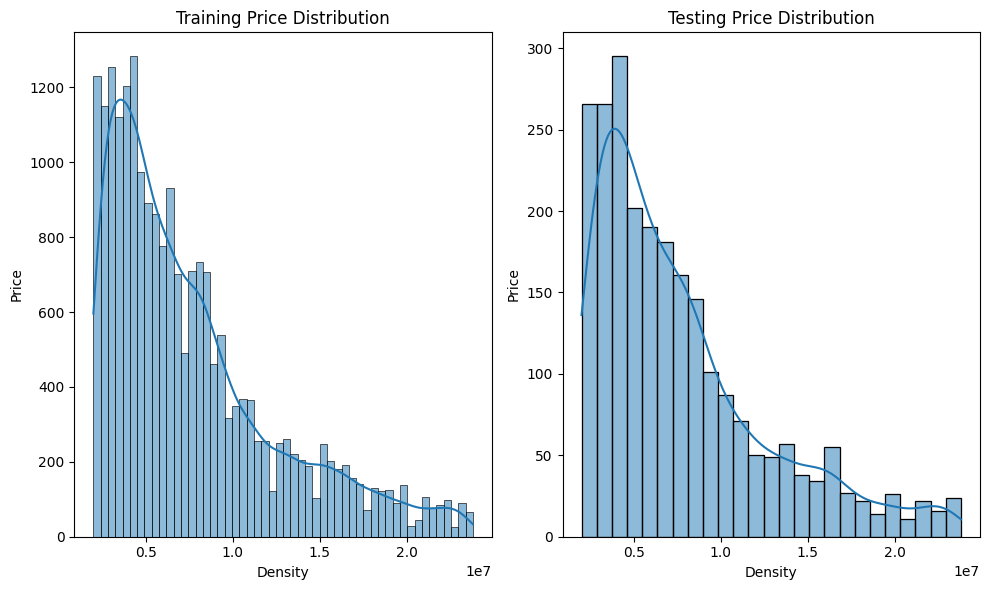

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))  # Create 2-row subplot for efficient layout

# Plot training data histogram with KDE (horizontal)
sns.histplot(y[train_index], kde=True, ax=axes[0])
axes[0].set_title("Training Price Distribution")
axes[0].set_xlabel("Density")  # Adjust for horizontal orientation
axes[0].set_ylabel("Price")

# Plot testing data histogram with KDE (horizontal)
sns.histplot(y[test_index], kde=True, ax=axes[1])
axes[1].set_title("Testing Price Distribution")
axes[1].set_xlabel("Density")  # Adjust for horizontal orientation
axes[1].set_ylabel("Price")

# Optional layout refinement
plt.tight_layout()

plt.show()

In [20]:
X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y[train_index], y[test_index]

# MinMaxScaler X

In [21]:
# @title MinMaxScaler X
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
type(X_train)

numpy.ndarray

In [22]:
type(y_train)

pandas.core.series.Series

In [23]:
# convert to numpy.ndarrray
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [24]:
type(y_train)

numpy.ndarray

# Define K-Fold cross validation function

In [27]:
def cross_validation(x_train, y_train, model, n_folds=5, random_state=42):
  cv = KFold(n_splits=n_folds, random_state=random_state, shuffle=True)
  scores = []

  for train_index, test_index in cv.split(x_train):
      X_train_fold, X_test_fold, y_train_fold, y_test_fold = x_train[train_index], x_train[test_index], y_train[train_index], y_train[test_index]

      model.fit(X_train_fold, y_train_fold.ravel())

      y_predict = model.predict(X_test_fold)

      r2 = r2_score(y_test_fold, y_predict)

      scores.append(r2)

  return scores, np.mean(scores)

# LinearRegression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

from prettytable import PrettyTable
import xgboost as xg

import multiprocessing

In [29]:
lrmodel = LinearRegression()
scores, avg_ = cross_validation(x_train=X_train, y_train=y_train, model=lrmodel, n_folds=5, random_state=42)

print("R2: ", scores)
print("Average R2:", avg_)

R2:  [0.1411499113913156, 0.12328151863962489, 0.13474778265312903, 0.10657750137889821, 0.13869942819360848]
Average R2: 0.12889122845131523


# XGboost

In [30]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 5, seed = 42)
scores, avg_ = cross_validation(x_train=X_train, y_train=y_train, model=xgb_r, n_folds=5, random_state=42)

print("R2: ", scores)
print("Average R2:", avg_)

R2:  [0.25684300353946243, 0.2530396630195846, 0.25427949913291636, 0.2309933946895505, 0.25828607067617404]
Average R2: 0.2506883262115376


# K-fold for hyperparameter tuning Xgboost

In [31]:
# define parameter list
# Define parameter list
n_estimators = list(range(11))
lr = list(map(lambda x: x/10, list(range(5, 16, 1))))

hyperparameter_score_list = []
for n_estimator in n_estimators:
  for learning_rate in lr:
    xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators=n_estimator, learning_rate=learning_rate, seed = 42)
    scores, avg_ = cross_validation(x_train=X_train, y_train=y_train, model=xgb_r, n_folds=5, random_state=42)
    hyperparameter_score_list.append((n_estimator, learning_rate, avg_))

In [32]:
best_params = max(hyperparameter_score_list, key=lambda x: x[2])
print(best_params)

(10, 0.5, 0.27263274728518533)


In [33]:
myTable = PrettyTable(["Number of estimator", "Learning rate", "Average R2 score"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2],3)])
print(myTable)

+---------------------+---------------+------------------+
| Number of estimator | Learning rate | Average R2 score |
+---------------------+---------------+------------------+
|          0          |      0.5      |      -2.416      |
|          0          |      0.6      |      -2.416      |
|          0          |      0.7      |      -2.416      |
|          0          |      0.8      |      -2.416      |
|          0          |      0.9      |      -2.416      |
|          0          |      1.0      |      -2.416      |
|          0          |      1.1      |      -2.416      |
|          0          |      1.2      |      -2.416      |
|          0          |      1.3      |      -2.416      |
|          0          |      1.4      |      -2.416      |
|          0          |      1.5      |      -2.416      |
|          1          |      0.5      |      0.181       |
|          1          |      0.6      |      0.202       |
|          1          |      0.7      |      0.219      

# Test set

In [34]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)
y_predict = lrmodel.predict(X_test)
r2 = r2_score(y_test, y_predict)
print(r2)

0.10123320690024418


In [37]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators=best_params[0], learning_rate=best_params[1], seed = 42)
xgb_r.fit(X_train, y_train)
y_predict = xgb_r.predict(X_test)
r2 = r2_score(y_test, y_predict)
print(r2)

0.27155344902165635


In [36]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators=5, seed = 42)
xgb_r.fit(X_train, y_train)
y_predict = xgb_r.predict(X_test)
r2 = r2_score(y_test, y_predict)
print(r2)

0.25269097292931375
